In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [2]:
'''  por uma questão estética, optei por primeiro calcular os pontos de lagrange
para que na hora que plotemos as curvas de nível, o pontos possam ser plotados juntos.
Cálculando os pontos de Lagrange'''
x,y = sp.symbols(['x','y'])

G = 6.67384e-11
M1 = 8e12  #palpite
R = 1e3   #palpite
M2 = M1/4
x1 = -M2*R/(M1+M2)
x2 = M1*R/(M1+M2)

r = sp.sqrt(x**2 +y**2)
w = np.sqrt(G*(M1 + M2)/R**3)

V = -G*M1/sp.sqrt((x-x1)**2 +(y -0)**2) -G*M2/sp.sqrt((x-x2)**2 +(y - 0)**2) - (w**2)*(r**2)/2
Pgrad = sp.diff(V,x).subs(y,0) + sp.diff(V,y).subs(y,0)
chutex = np.array([-600,400,900])        #para esse chute, primeiro foi observado o gráfico da célula abaixo.
Ly = np.zeros(5)
Lx = np.zeros(5)
for k in range(3):
        Lx[k] = sp.nsolve(Pgrad,(x),[chutex[k]])#    #Amarzenado em Lx as cordenadas X dos pontos de Lagrange no y=0

Psg = sp.diff(V,x) + sp.diff(V,y), sp.diff(V,x).subs(y,-1*y) + sp.diff(V,y).subs(y,-1*y)
solution = sp.nsolve(Psg,(x,y),[400,800])
Lx[3] = (solution[0])   #adicionando em Lx os valores das cordenas de X quando y != 0
Lx[4] = (solution[0])
Ly[3] = solution[1]
Ly[4] = -solution[1]
print('Lx',Lx)  #cordenadas X do ponto de Lagrange
print('Ly',Ly)  #cordenadas Y do ponto de lagrange


Lx [-1082.8394642    438.07595854  1271.04869074   300.
   300.        ]
Ly [   0.            0.            0.          866.02540378 -866.02540378]


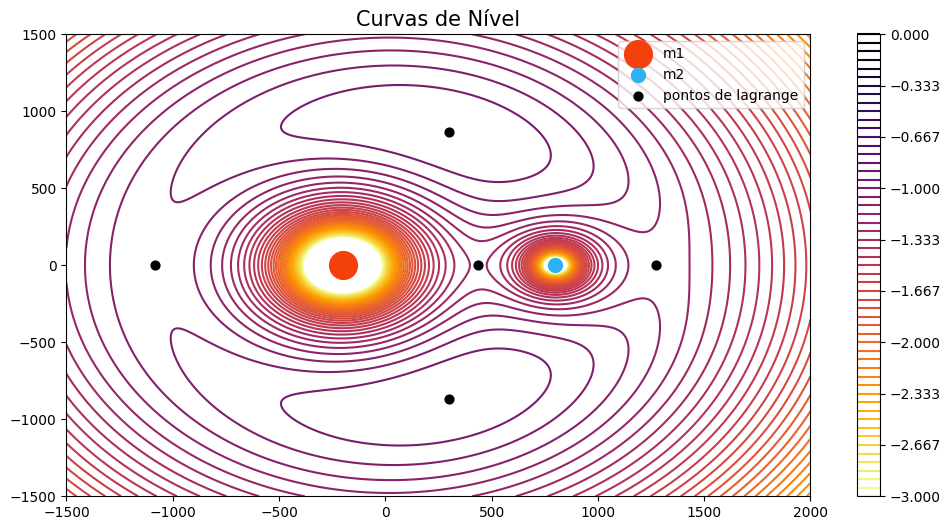

In [3]:
#gráfico de curvas com os pontos de Lagrange. Obs: o parâmetros são repetitos nessa célular para evitar recursão com anterior e demorar.
G = 6.67384e-11
M1 = 8e12  #palpite
R = 1e3   #palpite
M2 = M1/4


x = np.linspace(-1500, 2000, 2000)
y = np.linspace(-1500, 1500, 2000)
X, Y = np.meshgrid(x, y)

x1 = -M2*R/(M1+M2)
x2 = M1*R/(M1+M2)

r = np.sqrt(X**2 + Y**2)
w = np.sqrt(G*(M1 + M2)/R**3)
V = -G*M1/np.sqrt((X-x1)**2 +(Y -0)**2) -G*M2/np.sqrt((X-x2)**2 +(Y - 0)**2) - (w**2)*(r**2)/2
fig = plt.subplots(1,1)[0]
CS = plt.contour(X, Y, V,np.linspace(-3,0,55),cmap='inferno_r')
plt.scatter(x1,0,s=400,label ='m1',color = '#F2410A' )
plt.scatter(x2,0,s=100,label ='m2',color = '#2EB1F2')
plt.scatter(Lx,Ly,s=40,color='black',label='pontos de lagrange')
plt.legend()
plt.title('Curvas de Nível',fontsize=15)
fig.colorbar(CS)
fig.set_size_inches(12, 6)



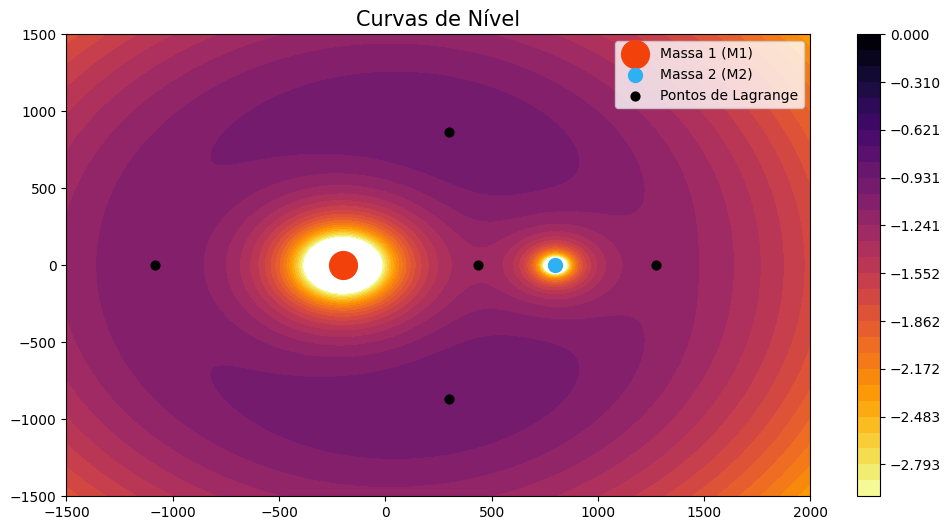

In [4]:
# Criação da figura
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Usando contourf para preencher os contornos com cores sólidas
CS = ax.contourf(X, Y, V, np.linspace(-3, 0, 30), cmap='inferno_r')

# Massas
ax.scatter(x1, 0, s=400, label='Massa 1 (M1)', color='#F2410A')
ax.scatter(x2, 0, s=100, label='Massa 2 (M2)', color='#2EB1F2')

# Pontos de Lagrange
ax.scatter(Lx, Ly, s=40, color='black', label='Pontos de Lagrange')

# Legendas e labels
ax.legend()
ax.set_title('Curvas de Nível', fontsize=15)

# Adição da barra de cores
fig.colorbar(CS)

# Ajuste do tamanho da figura
fig.set_size_inches(12, 6)

plt.show()